In [1]:
from google.colab import drive
drive.mount("/content/drive/")
import os
os.chdir('/content/drive/My Drive/AI Project')

Mounted at /content/drive/


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [3]:
data=pd.read_csv('corona_tested_individuals_ver_0083.english.csv',low_memory=False)
data

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-11-12,0,0,0,0,0,negative,No,male,Other
1,2020-11-12,0,1,0,0,0,negative,No,male,Other
2,2020-11-12,0,0,0,0,0,negative,Yes,female,Other
3,2020-11-12,0,0,0,0,0,negative,No,male,Other
4,2020-11-12,0,1,0,0,0,negative,No,male,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...
2742591,2020-03-11,0,0,0,0,0,negative,NaN,female,Other
2742592,2020-03-11,0,0,0,0,0,negative,NaN,female,Other
2742593,2020-03-11,0,0,0,0,0,other,NaN,male,Other
2742594,2020-03-11,0,0,0,0,0,negative,NaN,female,Other


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
l1 = LabelEncoder()
label1 = l1.fit_transform(data["corona_result"])
label2 = l1.fit_transform(data["age_60_and_above"])
label3 = l1.fit_transform(data["gender"])
label4 = l1.fit_transform(data["test_indication"])


In [6]:
df = data.drop([ "test_date","age_60_and_above","gender", "test_indication","corona_result"], axis='columns')
df

,cough,fever,sore_throat,shortness_of_breath,head_ache
0,0,0,0,0,0
1,0,1,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
2742591,0,0,0,0,0
2742592,0,0,0,0,0
2742593,0,0,0,0,0
2742594,0,0,0,0,0


In [7]:
df["age_60_and_above"]=label2
df["gender"]=label3
df["test_indication"]=label4
df["corona_result"]=label1

df

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication,corona_result
0,0,0,0,0,0,0,1,2,0
1,0,1,0,0,0,0,1,2,0
2,0,0,0,0,0,1,0,2,0
3,0,0,0,0,0,0,1,2,0
4,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...
2742591,0,0,0,0,0,2,0,2,0
2742592,0,0,0,0,0,2,0,2,0
2742593,0,0,0,0,0,2,1,2,1
2742594,0,0,0,0,0,2,0,2,0


In [8]:
feature_names=['cough','fever','sore_throat','shortness_of_breath','head_ache','age_60_and_above','gender','test_indication']
X=df[feature_names]
X

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication
0,0,0,0,0,0,0,1,2
1,0,1,0,0,0,0,1,2
2,0,0,0,0,0,1,0,2
3,0,0,0,0,0,0,1,2
4,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...
2742591,0,0,0,0,0,2,0,2
2742592,0,0,0,0,0,2,0,2
2742593,0,0,0,0,0,2,1,2
2742594,0,0,0,0,0,2,0,2


In [9]:
target_names=['negative','other','positive']
Y=df.corona_result
Y

0          0
1          0
2          0
3          0
4          0
          ..
2742591    0
2742592    0
2742593    1
2742594    0
2742595    0
Name: corona_result, Length: 2742596, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [12]:
#Initialising ANN
ann = Sequential()

In [13]:
#Adding first hidden layer
ann.add(Dense(9, input_dim=8, activation='relu'))

In [14]:
#Adding Second Hidden Layer
ann.add(Dense(9, activation='relu'))

In [15]:
#Adding Output Layer
ann.add(Dense(3, activation='softmax')) #for multiclass problem,activation function is softmax and for binary it is sigmoid

In [16]:
#Compiling ANN
ann.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
Y_train = tf.keras.utils.to_categorical(Y_train, 3)


In [18]:
Y_train.shape

(2194076, 3)

In [19]:
Y_train

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [20]:
#Fitting ANN
ann.fit(X_train,Y_train, validation_split=0.2 , batch_size=1024, epochs=150, verbose=2)


Epoch 1/150
1715/1715 - 3s - loss: 0.3270 - accuracy: 0.8944 - val_loss: 0.2668 - val_accuracy: 0.9195 - 3s/epoch - 2ms/step
Epoch 2/150
1715/1715 - 3s - loss: 0.2633 - accuracy: 0.9212 - val_loss: 0.2656 - val_accuracy: 0.9203 - 3s/epoch - 1ms/step
Epoch 3/150
1715/1715 - 3s - loss: 0.2624 - accuracy: 0.9219 - val_loss: 0.2645 - val_accuracy: 0.9213 - 3s/epoch - 1ms/step
Epoch 4/150
1715/1715 - 3s - loss: 0.2614 - accuracy: 0.9225 - val_loss: 0.2634 - val_accuracy: 0.9218 - 3s/epoch - 2ms/step
Epoch 5/150
1715/1715 - 3s - loss: 0.2605 - accuracy: 0.9238 - val_loss: 0.2628 - val_accuracy: 0.9228 - 3s/epoch - 1ms/step
Epoch 6/150
1715/1715 - 2s - loss: 0.2600 - accuracy: 0.9244 - val_loss: 0.2625 - val_accuracy: 0.9237 - 2s/epoch - 1ms/step
Epoch 7/150
1715/1715 - 3s - loss: 0.2597 - accuracy: 0.9248 - val_loss: 0.2623 - val_accuracy: 0.9241 - 3s/epoch - 1ms/step
Epoch 8/150
1715/1715 - 3s - loss: 0.2594 - accuracy: 0.9249 - val_loss: 0.2623 - val_accuracy: 0.9239 - 3s/epoch - 2ms/step


In [21]:
Y_pred = ann.predict(X_test)

In [22]:
Y_pred


array([[0.9425898 , 0.01439307, 0.04301704],
       [0.94063234, 0.0159176 , 0.04345008],
       [0.95347553, 0.01445695, 0.03206754],
       ...,
       [0.9510565 , 0.01563834, 0.03330519],
       [0.9510565 , 0.01563835, 0.0333052 ],
       [0.9510565 , 0.01563835, 0.0333052 ]], dtype=float32)

In [23]:
import numpy as np

Y_pred = np.argmax(Y_pred, axis=1)

In [24]:
Y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [26]:
print(classification_report(Y_test,Y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.95      0.97      0.96    496722
           1       0.00      0.00      0.00      8066
           2       0.63      0.56      0.59     43732

    accuracy                           0.93    548520
   macro avg       0.53      0.51      0.52    548520
weighted avg       0.91      0.93      0.92    548520



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
from sklearn.metrics import multilabel_confusion_matrix

In [28]:
cm=confusion_matrix(Y_test,Y_pred)

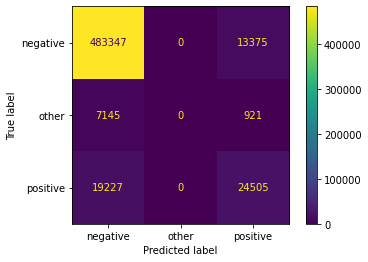

In [29]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target_names)
disp.plot()

In [30]:
from sklearn.metrics import precision_score,recall_score,accuracy_score

print('Accuracy is=',accuracy_score(Y_test,Y_pred))
print('Precision is=',precision_score(Y_test,Y_pred,average=None))
print('Recall is=',recall_score(Y_test,Y_pred,average=None))

Accuracy is= 0.925858674250711
Precision is= [0.94826169 0.         0.63155589]
Recall is= [0.97307347 0.         0.56034483]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


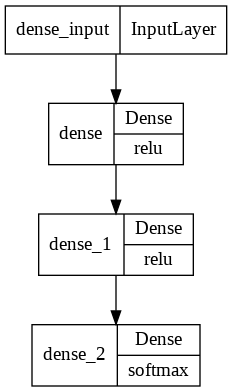

In [31]:
tf.keras.utils.plot_model(
    ann,
    to_file="ann.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=True,
)

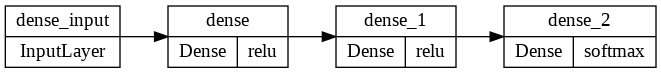

In [32]:
tf.keras.utils.plot_model(
    ann,
    to_file="ann-2.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="LR",
    expand_nested=True,
    dpi=96,
    layer_range=None,
    show_layer_activations=True,
)

In [33]:
tf.keras.models.save_model(model=ann, filepath="/Final_Model")

INFO:tensorflow:Assets written to: /Final_Model/assets


In [34]:
ann.save('model.h5')